In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from torch.autograd import Variable
from model_components import UNet

# stupid file path shit
import glob
import os

# For transformations on masks and images
from PIL import Image
from skimage import transform

In [2]:
img_files = []
for file in glob.glob(os.path.abspath('C:/Users/turbo/Python projects/Lane-finder/Lane-Finder/data/imgs/*.png')):
    img_files.append(file)

img_files = img_files[1000:]
new_size = (150, 200)

def image_loader():
    train_dataset = ImageDataset(img_files)
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=2,
        num_workers=0,
        shuffle=False
    )
    return train_loader


class ImageDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths):
        self.image_paths = image_paths

    def transform(self, image):

        # Resize
        resize = torchvision.transforms.Resize(new_size)
        image = resize(image)

        image = np.asarray(image).transpose((2, 0, 1))

        return image

    def __getitem__(self, index):
        image = Image.open(self.image_paths[index])
        x = self.transform(image)
        return x

    def __len__(self):
        return len(self.image_paths)


In [3]:
device = torch.device('cuda:0')
net = UNet(3, 1, bilinear=True).to(device)
net.load_state_dict(torch.load('C://Users//turbo//Python projects//Lane-finder//Lane-Finder//CNN//checkpoints//CONST_NUM_FILCP_epoch7.pth', map_location=device))

<All keys matched successfully>

In [4]:
val_loader = image_loader()

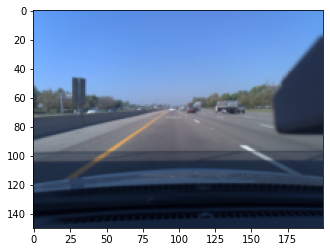

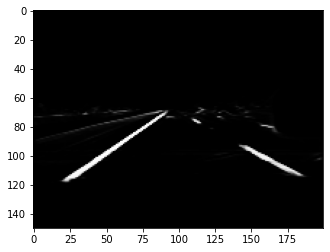

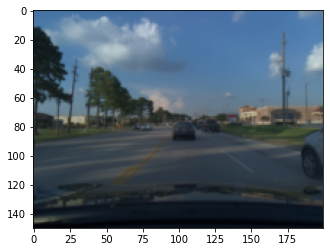

KeyboardInterrupt: 

In [5]:
net.eval()
m = torch.nn.Sigmoid()
for imgs in val_loader:
    imgs = imgs.to(device=device, dtype=torch.float32)
    with torch.no_grad():
        mask_pred = net(imgs)
        mask = m(mask_pred).cpu().numpy()
        i = 0
        img = np.round(np.array(imgs.cpu()))[i].transpose(1, 2, 0)
        mask_temp = mask[i]
        rgb_mask = np.vstack( (255*mask_temp, 255*mask_temp, 255*mask_temp) ).transpose(1, 2, 0)
        plt.imshow(np.round(img).astype(np.int32))
        plt.show()

        plt.imshow(rgb_mask.astype(np.int32))
        plt.show()


In [ ]:
dd